In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set()

In [2]:
tickers = ['XLB', 'XLE', 'XLF', 'XLI', 'XLK', 'XLP', 'XLU', 'XLV', 'XLY']
etf = yf.Tickers(tickers)
data = etf.history(start='2011-01-01',actions=False)
data.drop(['Open','High','Low','Volume'],inplace=True, axis=1)
data=data.droplevel(0,axis=1)
data

[*********************100%***********************]  9 of 9 completed


Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
2011-01-03 00:00:00+00:00,29.296574,43.438480,10.297139,27.092680,21.046318,20.413778,19.733894,25.319998,31.965923
2011-01-04 00:00:00+00:00,29.099854,43.065750,10.284508,27.054117,21.128950,20.358131,19.827902,25.399649,31.788567
2011-01-05 00:00:00+00:00,29.167965,43.236317,10.404536,27.192968,21.252892,20.365097,19.702562,25.455395,32.050381
2011-01-06 00:00:00+00:00,29.016628,42.825687,10.335047,27.146673,21.376846,20.295538,19.721365,25.558941,31.856131
2011-01-07 00:00:00+00:00,28.986374,43.135227,10.246605,27.200686,21.277693,20.191216,19.790295,25.543009,31.839247
...,...,...,...,...,...,...,...,...,...
2024-08-26 00:00:00+00:00,93.139999,91.199997,44.570000,129.139999,221.149994,82.419998,75.910004,155.369995,186.410004
2024-08-27 00:00:00+00:00,93.150002,90.349998,44.799999,129.220001,222.490005,82.620003,75.309998,155.610001,185.919998
2024-08-28 00:00:00+00:00,92.750000,89.769997,44.910000,129.160004,219.419998,82.269997,75.309998,155.789993,184.119995


In [3]:
# Return
rets = data.pct_change().fillna(0)
er = rets.mean() * 252

#cov
cov = rets.cov() * 252

In [4]:
er

Ticker
XLB    0.107148
XLE    0.093566
XLF    0.133563
XLI    0.134575
XLK    0.195281
XLP    0.112074
XLU    0.114977
XLV    0.147137
XLY    0.149705
dtype: float64

In [5]:
cov

Ticker,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Ticker,,,,,,,,,
XLB,0.042805,0.041597,0.037693,0.035544,0.032256,0.018866,0.019346,0.024021,0.031585
XLE,0.041597,0.077744,0.043256,0.038505,0.030546,0.018071,0.019330,0.023722,0.030450
XLF,0.037693,0.043256,0.048340,0.037393,0.033150,0.019964,0.019755,0.025708,0.033321
XLI,0.035544,0.038505,0.037393,0.037438,0.031686,0.018759,0.019102,0.023607,0.031222
XLK,0.032256,0.030546,0.033150,0.031686,0.046086,0.018792,0.017346,0.025151,0.036643
XLP,0.018866,0.018071,0.019964,0.018759,0.018792,0.019322,0.017556,0.016610,0.017884
XLU,0.019346,0.019330,0.019755,0.019102,0.017346,0.017556,0.031674,0.016549,0.016691
XLV,0.024021,0.023722,0.025708,0.023607,0.025151,0.016610,0.016549,0.026485,0.022880
XLY,0.031585,0.030450,0.033321,0.031222,0.036643,0.017884,0.016691,0.022880,0.040097


## Portfolio Simulation

In [6]:
p_returns = []
p_volatility= []

In [7]:
# number of asset
noa = len(tickers)
# number of port
n_ports = 10000

- np.random.random(9)는 NumPy 라이브러리의 random 모듈을 사용하여 0과 1 사이의 난수를 9개 생성하는 코드입니다. 이 코드는 0과 1 사이의 실수(부동 소수점 숫자)로 이루어진 9개의 요소를 가진 배열을 반환합니다.

In [15]:
np.random.random(9)

array([0.26977392, 0.56954317, 0.89439652, 0.4196561 , 0.62276019,
       0.54000378, 0.68155928, 0.8074889 , 0.64593438])

In [8]:
for i in range(n_ports):
    weights = np.random.random(noa)
    weights /= np.sum(weights) # weights/np.sum(weights)
    
    ret = np.dot(weights, er) #dot, 내적, weight x er
    vol = np.sqrt(np.dot(weights.T, np.dot(cov,weights))) # Weight(Transposed) x Sigma x Weight
    
    # 10000 simulation 
    p_returns.append(ret)
    p_volatility.append(vol)

In [9]:
p_returns

[0.13900919548478477,
 0.1356196701447028,
 0.1344838941702287,
 0.13257441535753178,
 0.12305403251919483,
 0.12860042486980935,
 0.1334751957888379,
 0.13916728911267698,
 0.13711495956719294,
 0.1455922416842124,
 0.13732312398187566,
 0.14153741132006584,
 0.13369302187211576,
 0.13610008081915537,
 0.12893622890122755,
 0.13025327964415978,
 0.12733672278469893,
 0.1354446328431072,
 0.12461001479095984,
 0.13138902573290281,
 0.12341777688707783,
 0.12631943812712731,
 0.12699462124938174,
 0.13193849339611652,
 0.13757291588301493,
 0.1344295717383178,
 0.1276237187189302,
 0.1322944335715811,
 0.13349609253941688,
 0.13856813037882695,
 0.1368731778131742,
 0.1385008486684939,
 0.12106403418557642,
 0.12435980687133857,
 0.1324726383324777,
 0.1378529315162824,
 0.1321980314928198,
 0.12013185792580348,
 0.12706294235550072,
 0.13067586890057253,
 0.1279520793675948,
 0.12807630960663324,
 0.11918267645540684,
 0.13517236476356578,
 0.13106787750029014,
 0.14809302645841577,
 0

In [10]:
p_volatility

[0.1565835346046706,
 0.17750962252117655,
 0.16554869069617204,
 0.17007277065038262,
 0.17972816815985304,
 0.16635323006655447,
 0.16256419378980042,
 0.19488393429643494,
 0.1582620711303349,
 0.16833613298883165,
 0.17808529138292847,
 0.15866870570867084,
 0.15050608088558864,
 0.17386708263910997,
 0.15960214255599853,
 0.17490313328142232,
 0.16840239775112895,
 0.18270064794083762,
 0.17892009909440326,
 0.16551604989315766,
 0.17045930288841127,
 0.16896110715478424,
 0.1634148962693449,
 0.16362805594488497,
 0.16565432609912056,
 0.1677049409740086,
 0.1772172187530968,
 0.17231937294591604,
 0.16723548954057524,
 0.16322079910915285,
 0.16706784781155706,
 0.16169295722033197,
 0.15830495616744955,
 0.16728002334267628,
 0.17915969766437048,
 0.17177720776653604,
 0.16533716536461124,
 0.172316002165498,
 0.16434646553288343,
 0.16563618252739257,
 0.17057343729384397,
 0.1756549171046282,
 0.16321970334964028,
 0.17469403274149467,
 0.15592343273905715,
 0.175645899018873

In [11]:
prets = np.array(p_returns)
pvols = np.array(p_volatility)

In [12]:
prets

array([0.1390092 , 0.13561967, 0.13448389, ..., 0.13223705, 0.1282256 ,
       0.13118738])

In [13]:
pvols

array([0.15658353, 0.17750962, 0.16554869, ..., 0.16817538, 0.1771543 ,
       0.16367253])

## Simulation Visualization

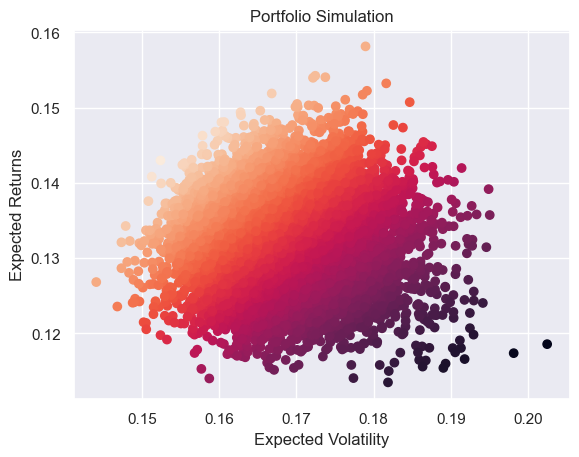

In [17]:
plt.scatter(x=pvols, y=prets, c=prets/pvols, marker='o') # color = (sharpe ratio)
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Returns')
plt.title('Portfolio Simulation')
plt.show()

### 최적화 모듈 `scipy.optimize`
파이썬의 `scipy` 패키지는 간단하게 최적화 계산을 수행할 수 있는 `optimize`라는 도구를 제공하고 있습니다. 이를 활용하면 우리는 최적화 계산을 수행하는 코드를 직접 만들 필요가 없습니다. 이 함수가 알아서 모든 계산 처리를 해주기 때문입니다. 우리는 최적화에 필요한 몇 가지 인자들을 함수에 넘겨주기만 하면 됩니다.


### [`scipy.optimize.minimize`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) 문법구조
```python
scipy.optimize.minimize(
    fun: 목적함수
    x0: 초기값
    args: 초기값 외에 목적함수에 전달할 인자
    method: 최적화를 수행할 알고리즘의 종류
    bounds: 상하한 경계값
    constraints: 제약조건
    )
```

`scipy.optimize.minimize()`의 문법구조의 위와 같습니다. 
- 우선 첫번째 인자는 최소화를 시켜주어야 하는 목적함수(`fun`)가 들어갑니다. 
- 두번째로는 초깃값(`x0`)입니다. 이 초기값은 가중치에 대한 초기값으로써 순수하게 임의의 값이 들어갈 수 있습니다. 다만 일반적으로는 전체 자산에 대해 동일한 가중치를 넣어주는 것이 관행입니다. 이 초기값에서 시작해서 최적화 알고리즘은 시행착오 방식을 통해 최적의 가중치를 찾아 여행을 떠납니다. 
- 세번째 인자는 목적함수에 전달해주어야 하는 인자(`args`)입니다. 가령 샤프비율 최소화가 목적함수라고 한다면 가중치 이외에도 샤프비율을 계산하기 위해 각 자산들의 기대수익률과 공분산행렬이 필요합니다. 
- 네번째는 최적화를 수행할 알고리즘의 종류(`method`)입니다. VOD에서 다룬 것처럼 우리는 앞으로 SLSQP 알고리즘을 사용할 것이기 때문에 여기에는 `SLSQP`라고 적어주면 됩니다. 
- 다섯번째는 상하한 경계값입니다. 여기서 말하는 상하한 경계값(`bnds`)은 각 가중치가 가질 수 있는 상하한값을 의미합니다. 롱온리 포트폴리오는 자산의 공매도를 가정하지 않기 때문에 이러한 조건을 여기에 적어주어야 합니다. 
- 마지막으로는 제약조건(`constraints`)입니다. 여기서 말하는 제약조건은 전체 자산 가중치들의 합이 1이 되어야 한다거나 포트폴리오의 수익률이 특정 기대수익률 수준이 되어야 한다거나 하는 조건들을 말합니다. 

파이썬 최적화 알고리즘은 목적함수와 제약조건을 명시적으로 알려주기만 하면 알아서 상황에 맞는 최적화 결과물을 산출해줍니다. 앞으로 다룰 여러 가지 횡적 배분 모델을 구현하는데 있어서 이러한 최적화 알고리즘은 필수적인 요소입니다.

In [19]:
import scipy.optimize as sco

In [20]:
def statistics(weights):
    weights = np.array(weights)
    pret = np.sum(er*weights)
    pvol = np.sqrt(np.dot(weights.T, np.dot(cov,weights)))
    return np.array([pret,pvol,pret/pvol])

In [21]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [22]:
weights

array([0.07510384, 0.06239386, 0.04511436, 0.2063177 , 0.01014207,
       0.01722593, 0.20433985, 0.19532793, 0.18403446])

In [23]:
np.sum(weights)

0.9999999999999999

## Target function 
### in this case : PF's volatility 

In [24]:
def obj_func(weights):
    return statistics(weights)[1] # 'def statistics function's [1] is 'pvol'

In [25]:
# 수익률 수준별 포트폴리오 최적화 수행
trets = np.linspace(0.09, 0.16, 50) # 0.09 부터 0.16까지 50번 균등하게 
tvols = []

# for문을 돌려 각 목표수익률에 맞는 포트폴리오 변동성 레벨을 계산
for tret in trets:

    # 투자 가중치 초기값 = 동일가중
    init_guess = np.repeat(1/noa, noa) # 0.111111 초기값, 1/9 를 9번

    # 제약조건 (포트폴리오 목표 수익률, 현금 보유 비중 0)
    cons = ({'type': 'eq', 'fun': lambda x: statistics(x)[0] - tret}, # 수익율 - 타켓 수익율 이 같아야한다.
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # Weight 전부

    # 자산별 경계조건 (숏 포지션 불가능)
    bnds = tuple((0.0, 1.0) for x in weights) #0.0~1.0 만. 음수 공매도는 안된다. 

    # 최적화 알고리즘 수행
    res = sco.minimize(obj_func,
                       init_guess,
                       method='SLSQP',
                       bounds=bnds,
                       constraints=cons)
    

    # 최적화 알고리즘을 통해 찾아낸 최적 포트폴리오의 변동성 값을 리스트에 저장
    tvols.append(res['fun'])

# 포트폴리오 변동성 리스트를 배열로 변환
tvols = np.array(tvols)

In [26]:
tvols

array([0.27882669, 0.27882669, 0.27882669, 0.27054217, 0.25438226,
       0.23864929, 0.22343349, 0.20884792, 0.19503402, 0.18216742,
       0.17046277, 0.16017501, 0.15159286, 0.14501946, 0.14067757,
       0.13850022, 0.13783643, 0.13731952, 0.1369159 , 0.13662678,
       0.13645864, 0.13643961, 0.13657268, 0.13682862, 0.13714829,
       0.13752254, 0.13795376, 0.13844168, 0.13898504, 0.13958381,
       0.14023699, 0.14094386, 0.14170361, 0.14251545, 0.14337834,
       0.14429147, 0.1452539 , 0.14627494, 0.14733008, 0.14843224,
       0.14958037, 0.15077307, 0.15200842, 0.15328711, 0.1546072 ,
       0.15596772, 0.15736764, 0.15880591, 0.16028146, 0.16179317])

In [27]:
# 좌측 경계선 데이터 수집
ind = np.argmin(tvols)
evols = tvols[ind:] # 21번째 이후 값부터 필요함
erets = trets[ind:]

In [29]:
ind

21

In [30]:
evols

array([0.13643961, 0.13657268, 0.13682862, 0.13714829, 0.13752254,
       0.13795376, 0.13844168, 0.13898504, 0.13958381, 0.14023699,
       0.14094386, 0.14170361, 0.14251545, 0.14337834, 0.14429147,
       0.1452539 , 0.14627494, 0.14733008, 0.14843224, 0.14958037,
       0.15077307, 0.15200842, 0.15328711, 0.1546072 , 0.15596772,
       0.15736764, 0.15880591, 0.16028146, 0.16179317])

In [31]:
erets

array([0.12      , 0.12142857, 0.12285714, 0.12428571, 0.12571429,
       0.12714286, 0.12857143, 0.13      , 0.13142857, 0.13285714,
       0.13428571, 0.13571429, 0.13714286, 0.13857143, 0.14      ,
       0.14142857, 0.14285714, 0.14428571, 0.14571429, 0.14714286,
       0.14857143, 0.15      , 0.15142857, 0.15285714, 0.15428571,
       0.15571429, 0.15714286, 0.15857143, 0.16      ])

Text(0.5, 1.0, 'Efficient Frontier')

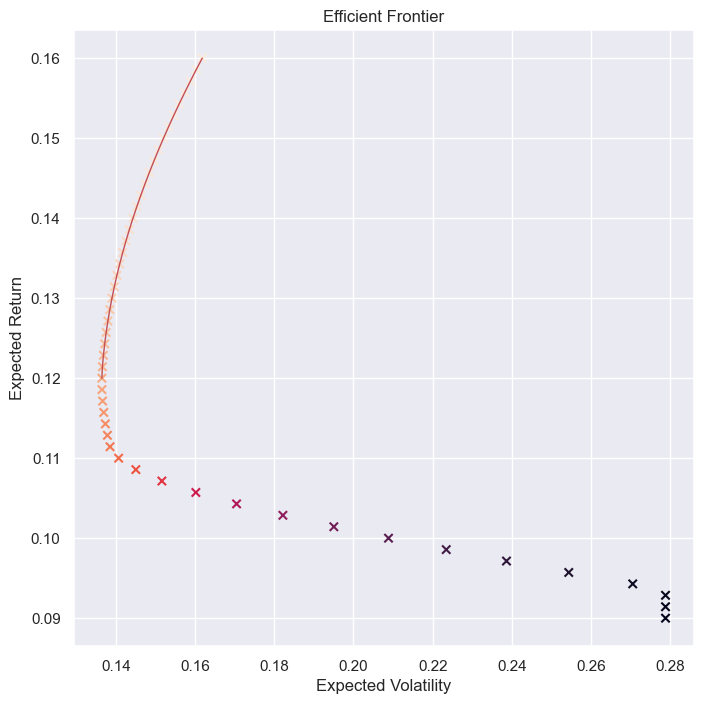

In [32]:
plt.figure(figsize=(8, 8))
plt.scatter(tvols, trets, c=trets/tvols, marker='x')
plt.plot(evols, erets, 'r', lw=1.0)
plt.grid(True)

plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier')